# Filtered Point Process Neuropixels Analysis

### Mateo Umaguing | 3.18.25

## Imports

In [ ]:
%reload_ext autoreload
%autoreload 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fppnpx.signalfuncs import load_signal, gen_all_channel_signals

## Display Settings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Loading Data

In [5]:
apath = r"C:\Users\Mateo\Desktop\TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0/TIBERIUS_CHKDLAY_DLPFC_NPIX45_063023_g0_t0.exported.imec0.ap.bin"
cpath = r"C:\Users\Mateo\Desktop\cluster_info_task.tsv"
wpath = r"C:\Users\Mateo\Desktop\20230630_DLPFCwaveforms.mat"

fs = 30000
time_window = [100,107]

signal_dataset = load_signal(appath=apath, time_window=time_window, fs=fs, cipath=cpath, wfpath=wpath)
channel_signals = gen_all_channel_signals(signal_dataset, 300, False)

Generated 112 channel signals.


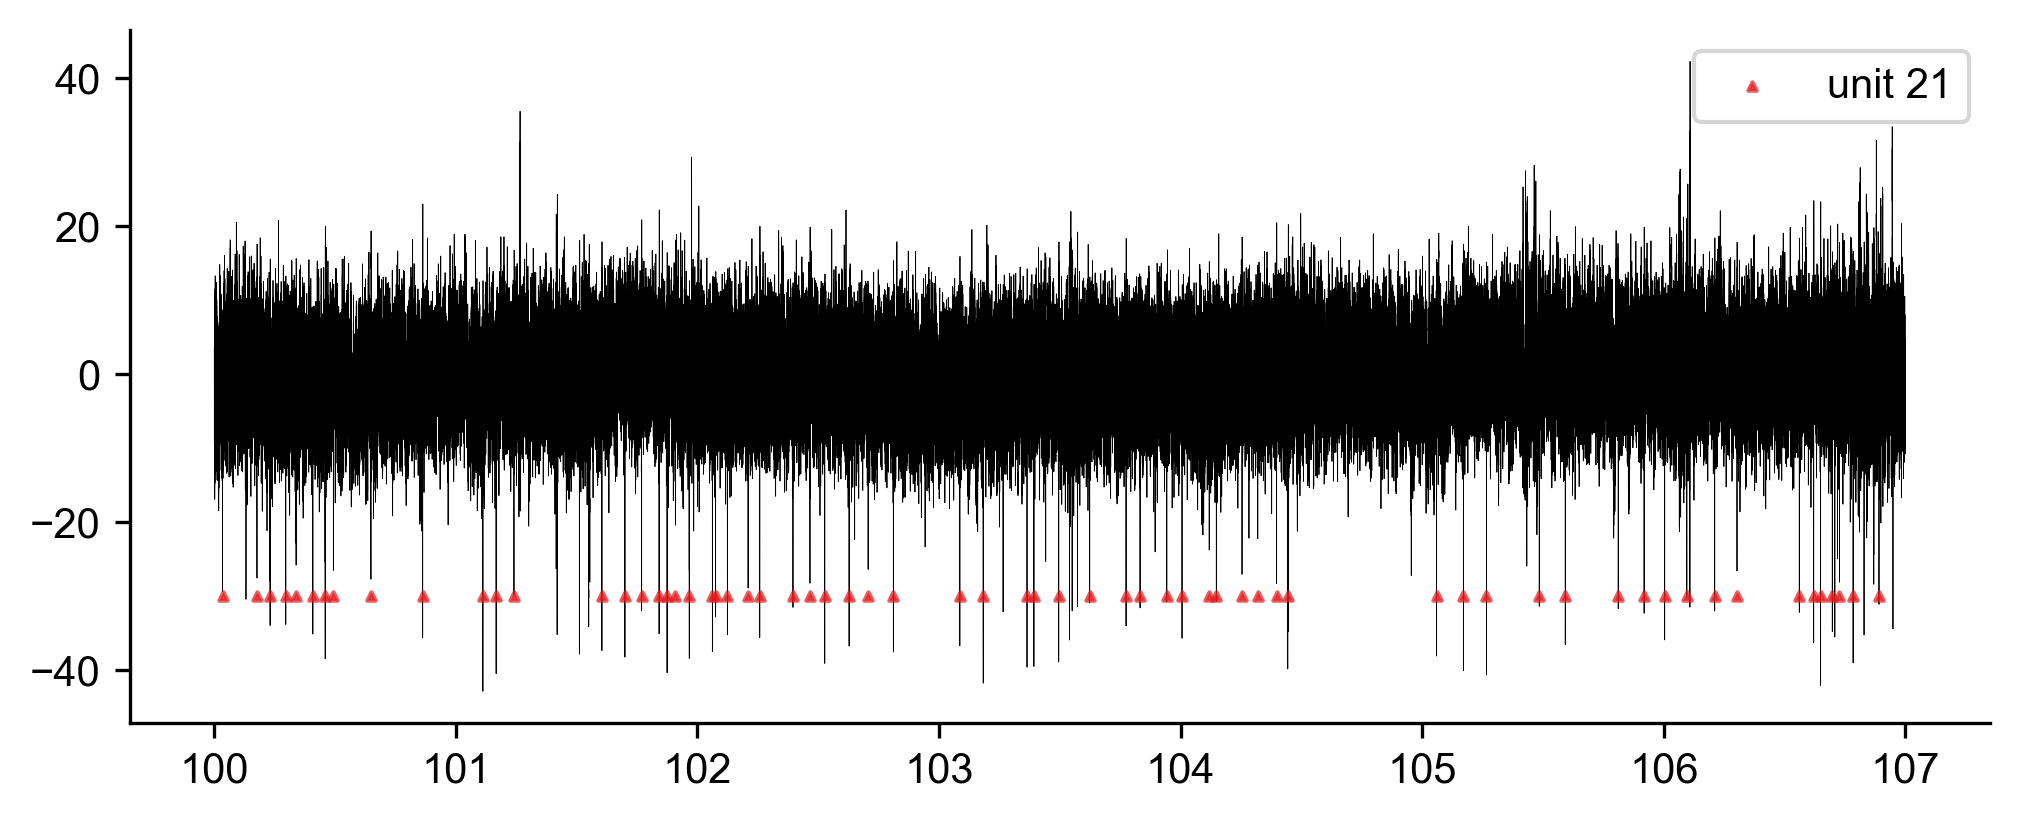

In [6]:
channel_signals["ch13"].plot_signal()

## Apply WaveMAP

In [ ]:
from wavemapnpx.WaveMAPClassifier import WaveMAPClassifier

In [27]:
%aimport wavemapnpx.WaveMAPClassifier

In [41]:
mean_unit_waveforms = np.array(signal_dataset["waveform_info"]["waveforms"]).mean(axis=2)
mean_unit_waveforms.shape

(138, 62)

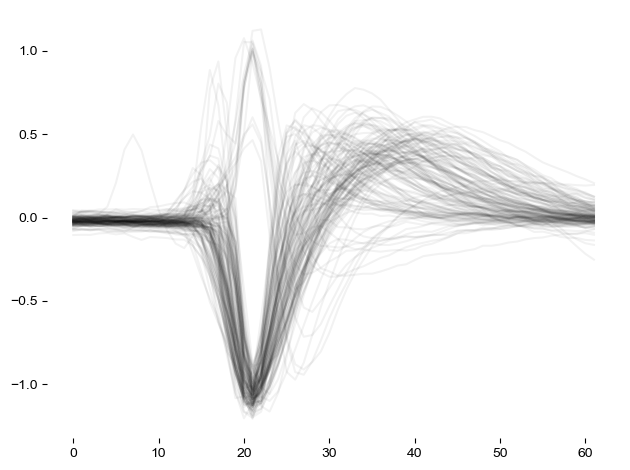

In [52]:
#wmc = wavemapnpx.WaveMAPClassifier.WaveMAPClassifier(mean_unit_waveforms)
wmc = WaveMAPClassifier(mean_unit_waveforms)
wmc.plot_waveforms()

In [53]:
wmc.compute_waveform_umap()
wmc.apply_louvain_method()

Computing UMAP: 15 neighbors | 0.1 minimum distance | random state 42
UMAP computed!
Applying Louvain method: 1.5 resolution
9 clusters detected.


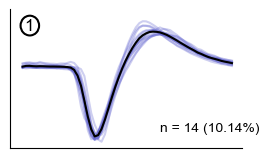

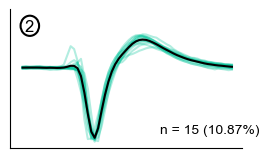

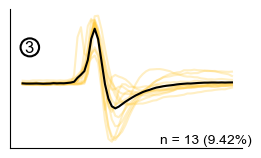

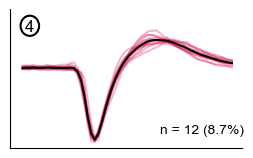

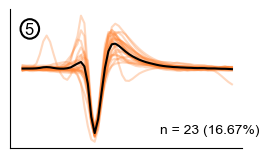

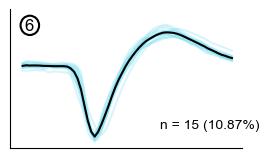

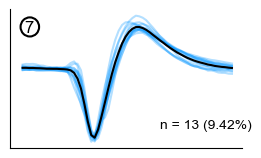

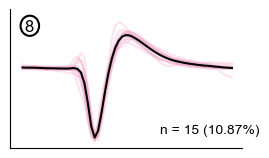

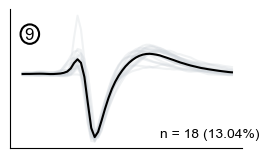

In [54]:
wmc.plot_groups()

In [69]:
np.save("chkdelay_dlpfc_0630_wavemap_clusters_0319", np.array(wmc.clustering_solution)) # TO-DO: dynamically name saved labels